In [1]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_movies=pd.read_csv("my_movies.csv")
my_movies

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
my_movies.isna().sum()

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [4]:
df=pd.get_dummies(my_movies)
df.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, Harry Potter1, Green Mile, V5..."
1393,0.1,"(V1_Sixth Sense, Green Mile, V5_LOTR2, Sixth S..."
1394,0.1,"(V1_Sixth Sense, Harry Potter1, Green Mile, V5..."
1395,0.1,"(V1_Sixth Sense, Harry Potter1, Green Mile, V5..."


In [6]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V3_Harry Potter1),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64212,(LOTR1),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64213,(V4_Green Mile),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64214,(V2_LOTR1),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [7]:
rules.sort_values('lift',ascending = False)[0:20]

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(V3_Harry Potter1, LOTR1, Sixth Sense, LOTR2)","(Harry Potter1, Green Mile, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(Harry Potter1, V5_LOTR2, Sixth Sense, LOTR1, ...",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(V5_LOTR2, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1, V4_Green M...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(LOTR1, Sixth Sense)","(Harry Potter1, V5_LOTR2, V4_Green Mile, V2_LO...",0.1,0.1,0.1,1.0,10.0,0.09,inf
52645,"(Green Mile, LOTR1, Sixth Sense, LOTR2)","(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, V2_L...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, Sixth Sense)","(Harry Potter1, V5_LOTR2, LOTR1, V4_Green Mile...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Sixth Sense, LOTR2)","(Harry Potter1, V5_LOTR2, LOTR1, V4_Green Mile...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(LOTR1, V4_Green Mile)","(Harry Potter1, V5_LOTR2, Sixth Sense, V2_LOTR...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, V2_LOTR1)","(Harry Potter1, V5_LOTR2, Sixth Sense, V4_Gree...",0.1,0.1,0.1,1.0,10.0,0.09,inf
52644,"(Green Mile, LOTR1, V2_LOTR1, Sixth Sense)","(V1_Sixth Sense, V5_LOTR2, V4_Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [8]:
rules[rules.lift>1]

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(V3_Harry Potter1),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64212,(LOTR1),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64213,(V4_Green Mile),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64214,(V2_LOTR1),"(V1_Sixth Sense, Harry Potter1, Green Mile, V5...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


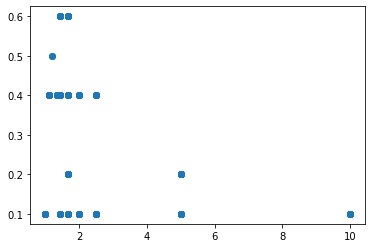

In [9]:
plt.scatter(x=rules['lift'],y=rules['support'])

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


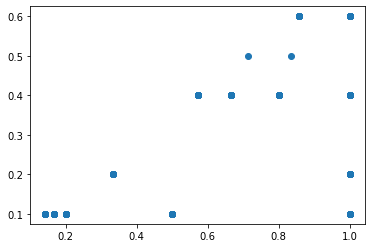

In [10]:

plt.scatter(x=rules['confidence'],y=rules['support'])